# MVN Sampler from Scratch

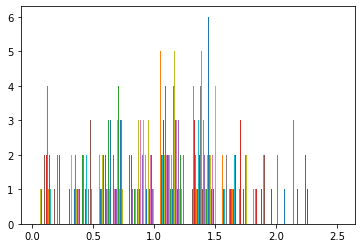

In [1]:
import numpy as np
from scipy.spatial.distance import cdist
from jax import random
import jax.numpy as jnp
import matplotlib.pyplot as plt

key = random.PRNGKey(1)
def multivariate_normal_sampler(key, mean, cov, shape, dtype):
  """Sample multivariate normal random values with given mean and covariance"""
  factor = jnp.linalg.cholesky(cov)
  normal_samples = random.uniform(key, shape + mean.shape[-1:], dtype)
  return mean + jnp.einsum('...ij,...j->...i', factor, normal_samples)

# for number of dimension = 10
X = random.normal(key, (10, 1))
K = jnp.exp(-cdist(X, X, "sqeuclidean")) + 1e-6 + jnp.eye(X.shape[0])
mean = jnp.zeros((X.shape[0], ))
samples = multivariate_normal_sampler(key, mean, K, (100,), jnp.float32)
plt.hist(samples)
plt.show()

## Comparison with the built-in function

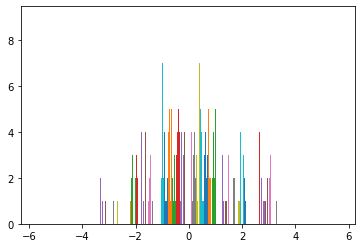

In [2]:
built_in_samples = random.multivariate_normal(key, mean, K, (1000,))
plt.hist(built_in_samples)
plt.show()

### References
1. https://jax.readthedocs.io/en/latest/_autosummary/jax.random.multivariate_normal.html
2. [Multivariate Normal Sampling with Numpy and Scipy](https://www.youtube.com/watch?v=ppd4c96hHH8)